## Gemini BuildWithAI 2025 Workshop

<a target="_blank" href="https://colab.research.google.com/github/mashhoodr/gemini-cookbook/blob/main/workshops/gemini-vibecoding.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>


This notebook is designed to help you become familiar with Gemini's API while creating some simple projects. We use "vibe coding" to help build some basic apps and test out the power of Gemini.

### Learning Outcomes

The objective of this workshop is to help the attendees become familiar with the offerings of Google Gemini, and give them an opportunity to try out the API themselves. We run through a few exercises to help understand the use cases for the different functionalities present.

### Authentication

The Gemini API uses API keys for authentication. We will now setup the API key in this colab - and test out our authentication. Your trainer has already demoed the instructions below.

You can [create](https://aistudio.google.com/app/apikey) your API key using Google AI Studio with a single click.  

Remember to treat your API key like a password. Do not accidentally save it in a notebook or source file you later commit to GitHub. This notebook shows you two ways you can securely store your API key.

* If you are using Google Colab, we recommend you store your key in Colab Secrets.

* If you are using a different development environment (or calling the Gemini API through `cURL` in your terminal), we recommend you store your key in an environment variable.

Let's start with Colab Secrets.

Add your API key to the Colab Secrets manager to securely store it.

1. Open your Google Colab notebook and click on the 🔑 **Secrets** tab in the left panel.
   
   <img src="https://storage.googleapis.com/generativeai-downloads/images/secrets.jpg" alt="The Secrets tab is found on the left panel." width=50%>

2. Create a new secret with the name `GOOGLE_API_KEY`.
3. Copy/paste your API key into the `Value` input box of `GOOGLE_API_KEY`.
4. Toggle the button on the left to allow notebook access to the secret.


### Install the Python SDK

In [1]:
!pip install -q -U google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.3/196.3 kB 5.2 MB/s eta 0:00:00


### Configure the SDK with your API key.

You'll call `genai.configure` with your API key, but instead of pasting your key into the notebook, you'll read it from Colab Secrets.

In [2]:
from google import genai
from google.genai import types
from google.colab import userdata
from pydantic import BaseModel
from IPython.display import Markdown, HTML, Image

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=GOOGLE_API_KEY)

And that's it! Now you're ready to use the Gemini API.

Now lets set our model we want to use throughout this notebook. You can change this to any available model.

In [4]:

MODEL = "gemini-2.0-flash"

### Running your first prompt

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to generate_content, and use the `.text` property to get the text content of the response.

In [24]:
response = client.models.generate_content(
    model=MODEL, contents="what is current weather in lahore"
)

print(response.text)

I'm sorry, I don't have access to the current weather information for Lahore. You can find the current weather information for Lahore by searching on Google or using a weather app.



> *Do it yourself: Update the above using a different Gemini version available. Did the response change?*

#### Use images in your prompt

Here we download an image from a URL and pass that image in our prompt.

First, we download the image and load it with PIL:

In [6]:
!curl -o image.jpg https://storage.googleapis.com/generativeai-downloads/images/jetpack.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  349k  100  349k    0     0  2094k      0 --:--:-- --:--:-- --:--:-- 2103k


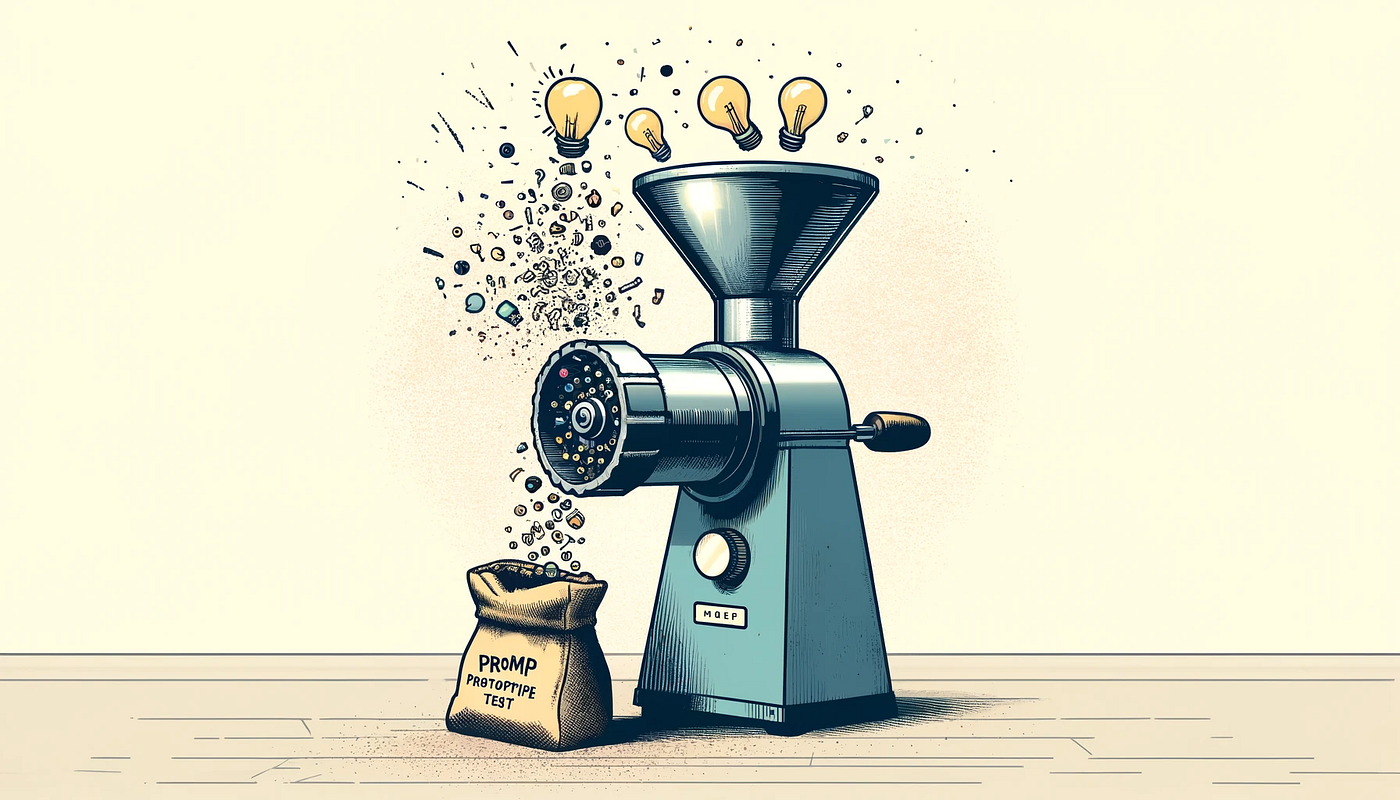

In [13]:
import PIL.Image
img = PIL.Image.open('testimg.png')
img

In [14]:
prompt = """
You are given an illustration that visually represents a conceptual or metaphorical idea, not just a literal product.
The image shows a mechanical device with objects entering it and processed output collected below.

Your task is to:
1. Analyze and describe the visual elements in the image as thoroughly as possible.
2. Identify the metaphor or symbolic meaning if applicable (e.g., representing ideas, creativity, or process automation).
3. Clearly list the notable features of the device, objects entering it, and any labeled components.
4. Present the description and features in the following JSON format:

{
  "description": "<Full descriptive paragraph about the image and its possible meaning>",
  "features": [
    "<Feature 1: Visual or functional element>",
    "<Feature 2: Visual or symbolic detail>",
    ...
  ]
}
"""


Then we can include the image in our prompt by just passing a list of items to `generate_content`. You can pass in multiple images, or prompts or files as per your requirement.

In [15]:
response = client.models.generate_content(
    model=MODEL,
    contents=[prompt, img]
)
print(response.text)

```json
{
  "description": "The illustration depicts a stylized meat grinder or processing machine. Ideas, represented by glowing lightbulbs, along with a mix of jumbled shapes and objects, are being fed into the top of the machine. The machine then processes this input and outputs a more refined substance, collected in a sack labeled 'PROMP Prototype Test'. The entire scene suggests a conceptual process where raw ideas and disparate elements are put through a system to create something more concrete and testable, likely related to prompt engineering and AI model creation. The visual style is detailed and slightly vintage, using a limited color palette to emphasize the mechanical nature of the concept.",
  "features": [
    "The device resembles a classic meat grinder with a large hopper on top.",
    "Three glowing lightbulbs representing ideas are entering the hopper.",
    "A variety of abstract shapes and objects are mixed with the lightbulbs, suggesting raw or undeveloped input.",

#### Uploading files

For types other than image, like audio, video or pdf - you can use the `upload_file` function to send data to Gemini.

The following list of documents are supported:

- PDF - application/pdf
- JavaScript - application/x-javascript, text/javascript
- Python - application/x-python, text/x-python
- TXT - text/plain
- HTML - text/html
- CSS - text/css
- Markdown - text/md
- CSV - text/csv
- XML - text/xml
- RTF - text/rtf

First download a PDF file into Colab.

In [11]:
URL = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"
!wget -q $URL -O sample.pdf

Then pass it into Gemini.

In [12]:
import pathlib
import io
import httpx


your_file = client.files.upload(file='sample.pdf')
prompt = "Can you summarize this file as a bulleted list?"

response = client.models.generate_content(
  model=MODEL,
  contents=[your_file, prompt])

Markdown(response.text)

Here is a summary of the Google Research blog post "Smoothly editing material properties of objects with text-to-image models and synthetic data", presented as a bulleted list:

**Overview:**
*   Presents a method to augment image generation models with parametric editing of material properties (color, shininess, transparency).
*   Fine-tunes a generative text-to-image (T2I) model on a synthetic dataset to achieve real-world photorealistic edits.

**Method:**

*   Uses traditional computer graphics rendering to create a synthetic dataset of 3D models with controlled material attributes, camera angles, and lighting.
*   Varies a single material attribute (roughness, transparency, etc.) across multiple images with different "edit strengths" (scalar values).
*   Modifies the Stable Diffusion 1.5 architecture to accept the edit strength value for fine-grained control.
*   Fine-tunes the model on the synthetic dataset to learn material property edits based on a context image, instruction, and scalar edit value.
*   Applies the trained model to real-world images by providing the new image and desired edit strength.

**Results:**

*   Successfully edits object material properties (metallic, transparency, roughness, albedo) while preserving object shape and lighting.
*   Demonstrates realistic effects, like filling in backgrounds for transparent objects and creating caustic lighting.
*   User study shows superior photorealistic edits and user preference compared to a baseline method (InstructPix2Pix).

**Applications:**

*   Enables easy editing for imagining new paint colors, creating product mockups, etc.
*   Edits are visually consistent for use in downstream 3D tasks.
*   Demonstrates the use of the method to edit input images for NeRF (Neural Radiance Fields) to synthesize novel views with edited materials.

**Conclusion:**

*   Presents a technique for controllable and photorealistic editing of material properties using T2I models and synthetic data.
*   Future research involves improving the model's ability to reveal hidden detail.


#### Supply a schema through model configuration
The following example does the following:

Instantiates a model configured through a schema to respond with JSON.
Prompts the model to return cookie recipes.

The Gemini API Python client library supports schemas defined with the following types (where AllowedType is any allowed type):

- string -> enum, format, nullable
- integer -> format, minimum, maximum, enum, nullable
- number -> format, minimum, maximum, enum, nullable
- boolean -> nullable
- array -> minItems, maxItems, items, nullable
- object -> properties, required, propertyOrdering, nullable

In [16]:

class Recipe(BaseModel):
  recipe_name: str
  ingredients: list[str]

response = client.models.generate_content(
    model=MODEL,
    contents='List a few popular cookie recipes.',
    config={
        'response_mime_type': 'application/json',
        'response_schema': list[Recipe],
    },
)

# Use the response as a JSON string.
print(response.text)

# Use instantiated objects.
my_recipes: list[Recipe] = response.parsed

[
  {
    "recipe_name": "Chocolate Chip Cookies",
    "ingredients": [
      "Butter",
      "Sugar",
      "Brown Sugar",
      "Eggs",
      "Vanilla Extract",
      "Flour",
      "Baking Soda",
      "Salt",
      "Chocolate Chips"
    ]
  },
  {
    "recipe_name": "Peanut Butter Cookies",
    "ingredients": [
      "Peanut Butter",
      "Butter",
      "Sugar",
      "Brown Sugar",
      "Egg",
      "Vanilla Extract",
      "Flour",
      "Baking Soda",
      "Salt"
    ]
  },
  {
    "recipe_name": "Oatmeal Raisin Cookies",
    "ingredients": [
      "Butter",
      "Brown Sugar",
      "Egg",
      "Vanilla Extract",
      "Flour",
      "Baking Soda",
      "Cinnamon",
      "Salt",
      "Oats",
      "Raisins"
    ]
  }
]


#### Use an enum to constrain output
In some cases you might want the model to choose a single option from a list of options. To implement this behavior, you can pass an enum in your schema. You can use an enum option anywhere you could use a str in the response_schema, because an enum is a list of strings. Like a JSON schema, an enum lets you constrain model output to meet the requirements of your application.

For example, assume that you're developing an application to classify musical instruments into one of five categories: "Percussion", "String", "Woodwind", "Brass", or ""Keyboard"". You could create an enum to help with this task.

In [17]:
import enum

class Instrument(enum.Enum):
  PERCUSSION = "Percussion"
  STRING = "String"
  WOODWIND = "Woodwind"
  BRASS = "Brass"
  KEYBOARD = "Keyboard"

response = client.models.generate_content(
    model=MODEL,
    contents='What type of instrument is an oboe?',
    config={
        'response_mime_type': 'text/x.enum',
        'response_schema': Instrument,
    },
)

print(response.text)

Woodwind


#### Have a chat

The Gemini API enables you to have freeform conversations across multiple turns.

The [ChatSession](https://ai.google.dev/api/python/google/generativeai/ChatSession) class will store the conversation history for multi-turn interactions.

In [ ]:
chat = client.chats.create(model=MODEL)
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
print(response.text)

You can see the chat history:

In [ ]:
for message in chat.get_history():
    print(f'role - {message.role}',end=": ")
    print(message.parts[0].text)

You can send another message to continue the conversation. The previous conversation is automatically sent in the next message as context.

In [ ]:
response = chat.send_message("What are the main components of a computer?")
print(response.text)

### Setting the system instruction

The system instruction in Gemini is a tool for developers to fine-tune the model's responses for specific tasks. It lets them define various aspects of how Gemini should generate responses [2].

Here are some key benefits of system instructions:

**Role definition:** You can specify the role Gemini should play, such as a home-cooking assistant or a music historian.

**Format control:** Instruct Gemini on the format of the response, like text, a list, or even a structured JSON object.

**Goal setting:** Clearly define the goal you want Gemini to achieve, making the response more focused and relevant.

**Rule establishment:** Set rules for Gemini to follow, ensuring the response adheres to your specific requirements.

In [25]:
response = client.models.generate_content(
    model=MODEL,
    contents=["Share a short story for children on kindness."],
    config=types.GenerateContentConfig(
        max_output_tokens=500,
        temperature=0.1,
        system_instruction="You are a primary school teacher specializing in early childhood education. Use positive reinforcement and interactive methods to teach basic concepts. Adapt your responses to the learning style of a young child."
    )
)
print(response.text)


Okay, gather 'round, little stars! Let's snuggle in and get ready for a story about... kindness! Are you ready? *claps hands excitedly*

Once upon a time, in a sunny little meadow filled with giggling flowers, lived a tiny ladybug named Dot. Dot was a very small ladybug, even smaller than most ladybugs! She had only six spots, and sometimes the bigger ladybugs didn't even notice her.

One day, Dot was buzzing around, trying to find a juicy leaf to munch on. She saw a big, beautiful sunflower, but it was surrounded by a group of bigger ladybugs, all pushing and shoving to get the best spot.

Suddenly, Dot saw a little caterpillar, Cuddles, crying under a leaf. "What's wrong, Cuddles?" Dot asked, her voice as gentle as a butterfly's wing.

Cuddles sniffled, "I... I wanted to get to the sunflower too, but those big ladybugs are being so mean! They keep pushing me away!"

Dot looked at the big ladybugs, then back at Cuddles' sad face. She knew she was small, but she also knew what was righ

## Let's do some practice!

Follow the instructions for the excercise below and add your code in the section after. You can use AI Studio or Gemini app to generate most of the code for the exercises below.

### Exercise 1: A Simple Story Generator with Gemini Chat API

**Problem statement**

When kids are learning how to read - for every kid its a very difficult and slow process. The only way to get better is practice. However the practice needs to be at the right level, simply reading the same book a thousand times isnt good enough.

Enter our story generator.
1. It can be designed to generate content at the right level, so for example grade one.
2. It can generate new content every time
3. It can generate content which appeals to the child, where they are the hero (check link below).

The right product will help the kids learn to read better over time.

**Theme Selection**

Present a list of themes (e.g., fantasy, sci-fi, mystery, historical) when the session starts.
Allow the user to input a theme or select from the list.

**Initial Story Generation**

Based on the selected theme, generate a short paragraph introducing the story and the user's character. Ensure its safe for children, uses easy to use language and as creative as possible.

**Action Selection**

Provide multiple action choices related to the current story.
Allow the user to select an action.

**Story Continuation**

Generate a new paragraph based on the user's chosen action, advancing the story.
Repeat steps 3 and 4 until a desired story length or ending condition is reached.

Idea is inspired by https://www.wander.ly/ - check their website for more inspiration.

**Execution Plan**

Think about generating a short story first, what elements from above do you need to configure.
Use the schemas from above.
Think about the constraints - what should it generate, and what shouldnt it generate.
Use the input function to take relevant inputs from the user.
Configure it to generate some actions for the next generation.
Present those actions for selection
Generate the next part until the user says stop.

In [33]:
# Exercise 1 solution here..
from google import genai
from google.genai import types
from google.colab import userdata
from pydantic import BaseModel
from IPython.display import Markdown, HTML, Image

# Assuming GOOGLE_API_KEY and MODEL are already defined from previous cells
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=GOOGLE_API_KEY)
MODEL = "gemini-2.0-flash"  # Or your preferred model


def choose_theme():
    """Presents a list of themes and allows the user to choose one."""
    themes = ["Fantasy", "Sci-Fi", "Mystery", "Historical", "Adventure", "Animal"]
    print("Choose a theme for your story:")
    for i, theme in enumerate(themes):
        print(f"{i+1}. {theme}")

    while True:
        try:
            choice = int(input("Enter the number of your chosen theme: "))
            if 1 <= choice <= len(themes):
                return themes[choice - 1]
            else:
                print("Invalid choice. Please enter a number between 1 and", len(themes))
        except ValueError:
            print("Invalid input. Please enter a number.")


def generate_story_part(chat, prompt):
    """Sends a message to the chat and returns the response text."""
    response = chat.send_message(prompt)
    return response.text


def get_user_action(actions):
    """Presents action choices to the user and gets their selection."""
    print("\nChoose your next action:")
    for i, action in enumerate(actions):
        print(f"{i+1}. {action}")
    print(f"{len(actions) + 1}. End Story")

    while True:
        try:
            choice = int(input("Enter the number of your chosen action: "))
            if 1 <= choice <= len(actions):
                return actions[choice - 1]
            elif choice == len(actions) + 1:
                return "End Story"
            else:
                print("Invalid choice. Please enter a number between 1 and", len(actions) + 1)
        except ValueError:
            print("Invalid input. Please enter a number.")


# --- Main Program ---
print("Welcome to the Story Generator!")
user_name = input("What is your name? (This will be the name of the hero) ") or "You"
theme = choose_theme()

# Initialize chat session
chat = client.chats.create(model=MODEL)

# First prompt
initial_prompt = f"""
Generate a short, child-friendly story in the {theme} theme.
Introduce a character named {user_name} as the hero.
The story should be suitable for a first-grade reading level.
Provide 3 possible actions that {user_name} can take at the end of the paragraph.
Format the output as follows:

Story: <story paragraph>
Actions:
- <action 1>
- <action 2>
- <action 3>
"""

# Generate and store story parts
story_part = generate_story_part(chat, initial_prompt)
full_story = [story_part]

print("\n--- Your Story Begins ---")
print(story_part)

# Continue the story interactively
while True:
    # Parse actions from story part
    story_lines = story_part.split('\n')
    actions_index = -1
    for i, line in enumerate(story_lines):
        if line.strip() == "Actions:":
            actions_index = i
            break

    if actions_index != -1:
        available_actions = [line.strip('- ').strip() for line in story_lines[actions_index + 1:] if line.strip()]
    else:
        print("Could not find actions in the story. Ending story.")
        break

    user_action = get_user_action(available_actions)

    if user_action == "End Story":
        print("\n--- Your Story Ends ---")
        break
    else:
        # Prompt for next part
        continuation_prompt = f"""
The hero, {user_name}, chooses to "{user_action}".
Continue the story based on this action.
Keep it child-friendly and at a first-grade reading level.
Provide 3 new possible actions for the next step.
Format the output as follows:

Story: <story continuation paragraph>
Actions:
- <action 1>
- <action 2>
- <action 3>
"""
        story_part = generate_story_part(chat, continuation_prompt)
        full_story.append(story_part)
        print("\n--- Story Continues ---")
        print(story_part)

# Compile and show the complete story
print("\n\n==== 🌟 Your Full Story 🌟 ====\n")
for part in full_story:
    lines = part.split('\n')
    story_only = []
    for line in lines:
        if line.strip() == "Actions:":
            break
        story_only.append(line)
    print('\n'.join(story_only).strip())


Welcome to the Story Generator!
What is your name? (This will be the name of the hero) Arham
Choose a theme for your story:
1. Fantasy
2. Sci-Fi
3. Mystery
4. Historical
5. Adventure
6. Animal
Enter the number of your chosen theme: 1

--- Your Story Begins ---
Story: Arham lived in the Whispering Woods. The trees there were very tall and whispered secrets to the wind. One day, a little bird with sparkly feathers flew to Arham. "The Glimmering Gem is gone!" chirped the bird. "The grumpy goblins took it! They want to turn the whole woods grey!" Arham knew the Glimmering Gem was the source of all the color and fun in the Whispering Woods. He had to get it back! He packed some berries and a small, wooden sword his grandpa made.

Actions:
- Arham could run straight to the goblin caves.
- Arham could ask the squirrels for help finding the goblins.
- Arham could try to make a deal with the goblins.


Choose your next action:
1. Arham could run straight to the goblin caves.
2. Arham could ask 

#### Let's continue to dive deeper with Function calling

To use function calling, pass a list of functions to the `tools` parameter when creating a [`GenerativeModel`](https://ai.google.dev/api/python/google/generativeai/GenerativeModel). The model uses the function name, docstring, parameters, and parameter type annotations to decide if it needs the function to best answer a prompt.

> Important: The SDK converts function parameter type annotations to a format the API understands (`glm.FunctionDeclaration`). The API only supports a limited selection of parameter types, and the Python SDK's automatic conversion only supports a subset of that: `AllowedTypes = int | float | bool | str | list['AllowedTypes'] | dict`

In [34]:
def add(a:float, b:float):
    """returns a + b."""
    return a+b

def subtract(a:float, b:float):
    """returns a - b."""
    return a-b

def multiply(a:float, b:float):
    """returns a * b."""
    return a*b

def divide(a:float, b:float):
    """returns a / b."""
    return a*b


config = {
    "tools": [add, subtract, multiply, divide],
}
chat = client.chats.create(model=MODEL, config=config)
response = chat.send_message('I have 57 cats, each owns 44 mittens, how many mittens is that in total?')
response.text

'That is 2508 mittens in total.\n'

However, by examining the chat history, you can see the flow of the conversation and how function calls are integrated within it.

The `ChatSession.history` property stores a chronological record of the conversation between the user and the Gemini model. Each turn in the conversation is represented by a [`glm.Content`](https://ai.google.dev/api/python/google/ai/generativelanguage/Content) object, which contains the following information:

*   **Role**: Identifies whether the content originated from the "user" or the "model".
*   **Parts**: A list of [`glm.Part`](https://ai.google.dev/api/python/google/ai/generativelanguage/Part) objects that represent individual components of the message. With a text-only model, these parts can be:
    *   **Text**: Plain text messages.
    *   **Function Call** ([`glm.FunctionCall`](https://ai.google.dev/api/python/google/ai/generativelanguage/FunctionCall)): A request from the model to execute a specific function with provided arguments.
    *   **Function Response** ([`glm.FunctionResponse`](https://ai.google.dev/api/python/google/ai/generativelanguage/FunctionResponse)): The result returned by the user after executing the requested function.

 In the previous example with the mittens calculation, the history shows the following sequence:

1.  **User**: Asks the question about the total number of mittens.
1.  **Model**: Determines that the multiply function is helpful and sends a FunctionCall request to the user.
1.  **User**: The `ChatSession` automatically executes the function (due to `enable_automatic_function_calling` being set) and sends back a `FunctionResponse` with the calculated result.
1.  **Model**: Uses the function's output to formulate the final answer and presents it as a text response.

In [35]:
for content in chat.get_history():
    print(content.role, "->", [(str(part.function_call) + ' -> ' + str(part.function_response)) for part in content.parts])
    print('-'*80)

user -> ['None -> None']
--------------------------------------------------------------------------------
model -> ["id=None args={'b': 44, 'a': 57} name='multiply' -> None"]
--------------------------------------------------------------------------------
user -> ["None -> will_continue=None scheduling=None id=None name='multiply' response={'result': 2508}"]
--------------------------------------------------------------------------------
model -> ['None -> None']
--------------------------------------------------------------------------------


#### Use Model Context Protocol (MCP)

Model Context Protocol (MCP) is an open standard to connect AI applications with external tools, data sources, and systems. MCP provides a common protocol for models to access context, such as functions (tools), data sources (resources), or predefined prompts. You can use models with MCP server using their tool calling capabilities.

MCP servers expose the tools as JSON schema definitions, which can be used with Gemini compatible function declarations. This lets you to use a MCP server with Gemini models directly. You can learn more about MCP and how to use it in the documentation:

https://ai.google.dev/gemini-api/docs/function-calling?example=weather#model_context_protocol_mcp


### Exercise 2: A Weather App using Function Calling.

Create a simple weather app using Python which will use function calling to fetch the latest weather when asked about for a specific location.

An example prompt for it can be: `Whats the weather like in Islamabad today?`

You can use the free api available on: https://www.weatherapi.com/

Bonus: Configure the temperature setting as well (C or F), with C being default.

When you ask for `Hows the weather in Karachi this week?` is it able to adjust the output accordingly?

What happens when you ask it a question like `Do I need an umbrella in Islamabad today?`

In [40]:
# Exercise 2 solution here.
import httpx
from google import genai
from google.genai import types
from google.colab import userdata
from pydantic import BaseModel

# Assuming GOOGLE_API_KEY and MODEL are already defined from previous cells
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=GOOGLE_API_KEY)
MODEL = "gemini-2.0-flash" # Or your preferred model

# WeatherAPI key
WEATHER_API_KEY = "1f5c1176824c496d85d75508252405" # Your WeatherAPI key

def get_weather(location: str, days: int = 1, temp_unit: str = "C"):
    """Fetches current or forecast weather data for a given location.

    Args:
        location: The name of the city or location.
        days: The number of days for the forecast (1 for current, up to 10 for forecast). Defaults to 1.
        temp_unit: The temperature unit ('C' for Celsius, 'F' for Fahrenheit). Defaults to 'C'.

    Returns:
        A string containing the weather information or an error message.
    """
    base_url = "http://api.weatherapi.com/v1/forecast.json"
    params = {
        "key": WEATHER_API_KEY,
        "q": location,
        "days": days,
    }

    try:
        response = httpx.get(base_url, params=params)
        response.raise_for_status() # Raise an exception for bad status codes
        weather_data = response.json()

        if "error" in weather_data:
            return f"Error fetching weather data: {weather_data['error']['message']}"

        if days == 1:
            # Current weather
            current = weather_data["current"]
            temp = current[f"temp_{temp_unit.lower()}"]
            condition = current["condition"]["text"]
            humidity = current["humidity"]
            return (f"The current weather in {location} is {condition} with a temperature of "
                    f"{temp}°{temp_unit}. Humidity is {humidity}%.")
        else:
            # Forecast weather
            forecast = weather_data["forecast"]["forecastday"]
            result = f"Weather forecast for {location} for the next {days} day(s):\n"
            for day_data in forecast:
                date = day_data["date"]
                max_temp = day_data["day"][f"maxtemp_{temp_unit.lower()}"]
                min_temp = day_data["day"][f"mintemp_{temp_unit.lower()}"]
                condition = day_data["day"]["condition"]["text"]
                result += f"  {date}: {condition}, Max Temp: {max_temp}°{temp_unit}, Min Temp: {min_temp}°{temp_unit}\n"
            return result

    except httpx.RequestError as e:
        return f"An error occurred while requesting weather data: {e}"
    except Exception as e:
        return f"An unexpected error occurred: {e}"


# Configure the model with the function call tool
config = {
    "tools": [get_weather],
}

# Create a chat session with the configured model
chat = client.chats.create(model=MODEL, config=config)

print("Welcome to the Weather App!")
print("Ask me about the weather in a specific location.")
print("You can ask for current weather or a forecast for up to 10 days.")
print("Example questions:")
print("- Whats the weather like in Islamabad today?")
print("- Hows the weather in Karachi this week?")
print("- Do I need an umbrella in Islamabad today?")
print("- What's the temperature in New York in Fahrenheit?")

while True:
    user_input = input("\nYou: ")
    if user_input.lower() in ["exit", "quit", "stop"]:
        print("Goodbye!")
        break

    try:
        # Send the message to the chat
        response = chat.send_message(user_input)

        # Check if the model wants to call a function
        if response.candidates and response.candidates[0].content.parts[0].function_call:
            function_call = response.candidates[0].content.parts[0].function_call
            function_name = function_call.name
            function_args = {key: value for key, value in function_call.args.items()}

            print(f"Model requested to call function: {function_name} with args: {function_args}")

            # Execute the function (this is manual execution in this example)
            if function_name == "get_weather":
                result = get_weather(**function_args)
                print(f"Function result: {result}")

                # Send the function response back to the model
                response = chat.send_message(
                    types.Content(
                        parts=[types.FunctionResponse(name=function_name, response={"result": result})]
                    )
                )
                print("Model: " + response.text)
            else:
                print(f"Error: Unknown function requested by the model: {function_name}")
        else:
            # If no function call, print the model's text response
            print("Model: " + response.text)

    except Exception as e:
        print(f"An error occurred during conversation: {e}"

Welcome to the Weather App!
Ask me about the weather in a specific location.
You can ask for current weather or a forecast for up to 10 days.
Example questions:
- Whats the weather like in Islamabad today?
- Hows the weather in Karachi this week?
- Do I need an umbrella in Islamabad today?
- What's the temperature in New York in Fahrenheit?

You: what is weather in lahr
Model: The current weather in lahr is Sunny with a temperature of 12.0°C. Humidity is 58%.


You: what is current weather in lahore
Model: The current weather in lahore is Sunny with a temperature of 38.0°C. Humidity is 35%.


You: What is weather in lahore
Model: The current weather in lahore is Sunny with a temperature of 38.0°C. Humidity is 35%.


You: what is weather in lahore
Model: The current weather in lahore is Sunny with a temperature of 38.0°C. Humidity is 35%.


You: how the weather in lahore this week
Model: Here is the weather forecast for Lahore for the next 7 days:
2025-05-24: Sunny, Max Temp: 44.1°C, Mi

### Using Code Execution

The Gemini API code execution feature enables the model to generate and run Python code and learn iteratively from the results until it arrives at a final output. You can use this code execution capability to build applications that benefit from code-based reasoning and that produce text output. For example, you could use code execution in an application that solves equations or processes text.

The code execution environment includes the following libraries: altair, chess, cv2, matplotlib, mpmath, numpy, pandas, pdfminer, reportlab, seaborn, sklearn, statsmodels, striprtf, sympy, and tabulate. You can't install your own libraries.

In [37]:
response = client.models.generate_content(
  model=MODEL,
  contents='What is the sum of the first 50 prime numbers? '
           'Generate and run code for the calculation, and make sure you get all 50.',
  config=types.GenerateContentConfig(
    tools=[types.Tool(
      code_execution=types.ToolCodeExecution
    )]
  )
)

def display_code_execution_result(response):
  for part in response.candidates[0].content.parts:
    if part.text is not None:
      display(Markdown(part.text))
    if part.executable_code is not None:
      code_html = f'<pre style="background-color: #BBBBEE;">{part.executable_code.code}</pre>' # Change code color
      display(HTML(code_html))
    if part.code_execution_result is not None:
      display(Markdown(part.code_execution_result.output))
    if part.inline_data is not None:
      display(Image(data=part.inline_data.data, format="png"))
    display(Markdown("---"))

display_code_execution_result(response)

Okay, I can help you with that. Here's how I'll approach this:

1.  **Generate a list of the first 50 prime numbers.** I'll start by generating a sequence of numbers and checking each one for primality. I'll keep adding to the list until I have 50 primes.
2.  **Calculate the sum.** Once I have the list of primes, I'll calculate their sum.
3.  **Present the result.** I'll provide the sum and the list of primes used in the calculation.

Here is the code:


---

---

primes=[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229]
sum_of_primes=5117


---

The sum of the first 50 prime numbers is 5117. The list of primes used is \[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229].


---

#### Prompt Caching

One of the cool new features which has been added by Gemini is prompt caching. If a part of your prompt or instructions is not changing, you can save some tokens by caching that part of the prompt. This is very useful in production where the same prompt might be used for thousands and millions of times and allows us to optimize cost.

In order to use the cache, we create a cache context and then call the generate content endpoint with the additional context.

First we download some data which is reused again and again across context.

In [42]:
!wget -q https://storage.googleapis.com/generativeai-downloads/data/a11.txt
!head a11.txt

INTRODUCTION

This is the transcription of the Technical Air-to-Ground Voice Transmission (GOSS NET 1) from the Apollo 11 mission.

Communicators in the text may be identified according to the following list.

Spacecraft:
CDR	Commander	Neil A. Armstrong
CMP	Command module pilot   	Michael Collins
LMP	Lunar module pilot	Edwin E. ALdrin, Jr.


In [45]:
import datetime

# upload the files.
document = client.files.upload(file="a11.txt")

cache_model='models/gemini-2.0-flash-001'

# Create a cache with a 5 minute TTL
cache = client.caches.create(
    model=cache_model,
    config=types.CreateCachedContentConfig(
      display_name='transcript',
      system_instruction=(
          "You are an expert at analyzing transcripts."
      ),
      contents=[document],
      ttl="300s",
  )
)

# Construct a GenerativeModel which uses the created cache.
response = client.models.generate_content(
  model = cache_model,
  contents= ("Find a lighthearted moment from this transcript"),
  config=types.GenerateContentConfig(cached_content=cache.name)
)


print(response.text)


print(response.usage_metadata)

ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'TotalCachedContentStorageTokensPerModelFreeTier limit exceeded for model gemini-2.0-flash: limit=0, requested=322698', 'status': 'RESOURCE_EXHAUSTED'}}

In [46]:
# Once you have used the cache you can also delete it (or it expires automatically at the given time)
client.caches.delete(name=cache.name)

NameError: name 'cache' is not defined

#### URL Context

This is the latest functionality just dropped into the SDK, which allows you to provide Gemini with URLs as additional context for your prompt. The model can then retrieve content from the URLs and use that content to inform and shape its response.

This tool is useful for tasks like the following:

- Extracting key data points or talking points from articles
- Comparing information across multiple links
- Synthesizing data from several sources
- Answering questions based on the content of a specific page or pages
- Analyzing content for specific purposes (like writing a job description or creating test questions)

In [ ]:
model_id = "gemini-2.5-flash-preview-05-20"

url_context_tool = types.Tool(
    url_context = types.UrlContext
)

response = client.models.generate_content(
    model=model_id,
    contents="Compare recipes from https://www.indianhealthyrecipes.com/chicken-biryani-recipe/ and https://www.teaforturmeric.com/chicken-biryani/",
    config=types.GenerateContentConfig(
        tools=[url_context_tool],
        response_modalities=["TEXT"],
    )
)

for each in response.candidates[0].content.parts:
    print(each.text)
# get URLs retrieved for context
print(response.candidates[0].url_context_metadata)

### Exercise 3: An Assessment Generator for School Teachers.

This is a slightly more complex one, we definitely dont want to single shot this app. I have listed down some prompts/requirements below - you can use these to build up the app step by step. You can choose to change these prompts or add any other functionality you like as well. We want to be able to "teach at right level" and think about creating a mixture of seen and unseen questions. We can use the PDF link to understand the scope and extract some relevant questions from there.

As you build up the functionality, think about testing this app, and how you will ensure that nothing is breaking after each iteration.

1. Download the Grade 4 Maths book from here: `https://drive.google.com/file/d/1yc-jZ3r7etKX0JpMW2rSO0uOLlzZ8Ckk/view?usp=sharing`
2. Extract one topic from Unit 1, e.g. Comparing and Ordering numbers. Pages 13 to 18.
3. Upload this slice as a cache on Gemini, with expire of one hour.
4. Use URL Context to add additional context for generating the assessment: `https://teaching.betterlesson.com/lesson/496389/comparing-and-ordering-whole-numbers`
5. Use the Code Execution to solve the generated questions and build an answer sheet.
6. Generate a formative assessment with 10 questions, including the ruberic and the answer sheet with it.

In [ ]:
# Exercise 3 code here.

## Thank you.

Thank you for attending this workshop. You can find more details about me on https://karachiwala.dev. I am available over most platforms as @mashhoodr.

You can find many more examples for Gemini on the following repositories.

- https://github.com/google-gemini/cookbook
- https://github.com/GoogleCloudPlatform/generative-ai

If you have any feedback on this workshop please share it with me using the following link:

https://docs.google.com/forms/d/1iAEO1JSlh6GTLC0uudUxAiTDiNN_iMzfdCwDLZ_78sg/edit
